In [ ]:
#@title ME 592: Data Analytics and Machine Learning for Cyber-Physical Systems Homework 1

# Import required libraries
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange
import seaborn as sns
import pandas as pd
from datetime import datetime
import scipy.stats as stats

In [ ]:
#@title Problem 2.1: Images
def mnist_analysis():
    # 1. Download MNIST dataset and create subset
    train_dataset = torchvision.datasets.MNIST(
        root='./data',
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )

    # Create subset of 1000 samples
    subset_indices = torch.randperm(len(train_dataset))[:1000]
    subset_data = torch.stack([train_dataset[i][0] for i in subset_indices])
    subset_labels = torch.tensor([train_dataset[i][1] for i in subset_indices])

    # 2. Plot histogram of classes
    plt.figure(figsize=(10, 6))
    plt.hist(subset_labels.numpy(), bins=10, rwidth=0.8)
    plt.title('Histogram of MNIST Classes in Subset')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(range(10))
    plt.show()

    # 3. Batch the subset using einops
    # Input shape is [1000, 1, 28, 28]
    # Target shape is [40, 25, 1, 28, 28]
    batched_data = rearrange(subset_data, '(b n) c h w -> b n c h w', n=25)
    print(f"Batched data shape: {batched_data.shape}")

    # 4. 3D plot of random sample
    random_idx = np.random.randint(1000)
    sample_image = subset_data[random_idx].squeeze().numpy()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x, y = np.meshgrid(range(28), range(28))
    ax.plot_surface(x, y, sample_image, cmap='viridis')
    ax.set_title(f'3D Plot of MNIST Digit {subset_labels[random_idx]}')
    ax.set_xlabel('X Pixel')
    ax.set_ylabel('Y Pixel')
    ax.set_zlabel('Intensity')
    plt.show()

Running MNIST Analysis...


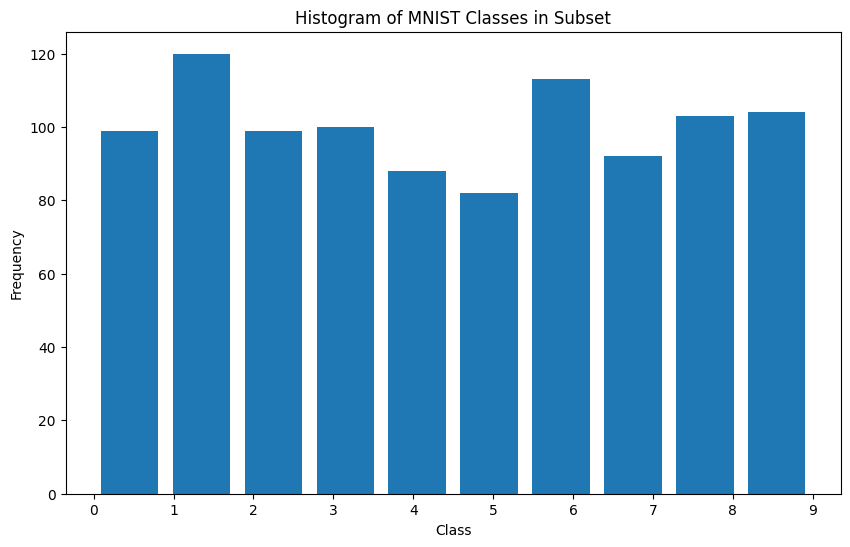

Batched data shape: torch.Size([40, 25, 1, 28, 28])


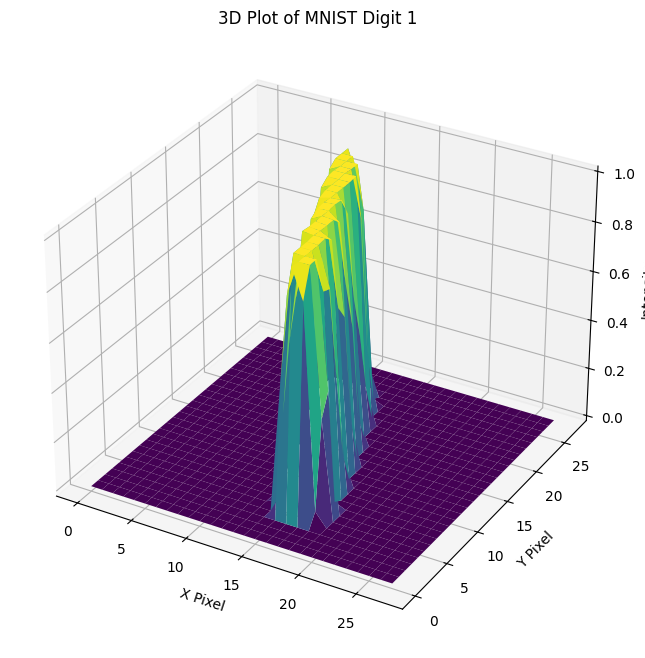

In [ ]:
if __name__ == "__main__":
    print("Running MNIST Analysis...")
    mnist_analysis()

In [ ]:
#@title Problem 2.2: Time Series
def energy_analysis():
    # Load the energy data
    df = pd.read_csv('energydata_complete.csv', parse_dates=['date'])

    # 1. Plot energy consumption for whole period and one week
    plt.figure(figsize=(15, 5))
    plt.plot(df['date'], df['Appliances'])
    plt.title('Appliances Energy Consumption - Full Period')
    plt.xlabel('Date')
    plt.ylabel('Energy (Wh)')
    plt.show()

    # One week view
    one_week = df.iloc[:1008].copy()  # Create explicit copy for 7 days * 24 hours * 6 (10-minute intervals)
    plt.figure(figsize=(15, 5))
    plt.plot(one_week['date'], one_week['Appliances'])
    plt.title('Appliances Energy Consumption - One Week')
    plt.xlabel('Date')
    plt.ylabel('Energy (Wh)')
    plt.show()

    # 2. Heatmap of hourly consumption
    one_week.loc[:, 'hour'] = one_week['date'].dt.hour
    one_week.loc[:, 'day'] = one_week['date'].dt.day
    hourly_consumption = one_week.pivot_table(
        values='Appliances',
        index='hour',
        columns='day',
        aggfunc='mean'
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(hourly_consumption, cmap='YlOrRd')
    plt.title('Hourly Energy Consumption Heatmap')
    plt.xlabel('Day of Week')
    plt.ylabel('Hour of Day')
    plt.show()

    # 3. Histogram of energy consumption
    plt.figure(figsize=(10, 6))
    plt.hist(df['Appliances'], bins=50)
    plt.title('Histogram of Appliances Energy Consumption')
    plt.xlabel('Energy (Wh)')
    plt.ylabel('Frequency')
    plt.show()

    # 4. Create NSM feature and plot
    df['NSM'] = df['date'].dt.hour * 3600 + df['date'].dt.minute * 60
    plt.figure(figsize=(10, 6))
    plt.scatter(df['NSM'], df['Appliances'], alpha=0.1)
    plt.title('Energy Consumption vs. Seconds from Midnight')
    plt.xlabel('Seconds from Midnight')
    plt.ylabel('Energy (Wh)')
    plt.show()

    # 5. Plot energy vs pressure
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Press_mm_hg'], df['Appliances'], alpha=0.1)
    plt.title('Energy Consumption vs. Pressure')
    plt.xlabel('Pressure (mm Hg)')
    plt.ylabel('Energy (Wh)')
    plt.show()


Running Energy Analysis...


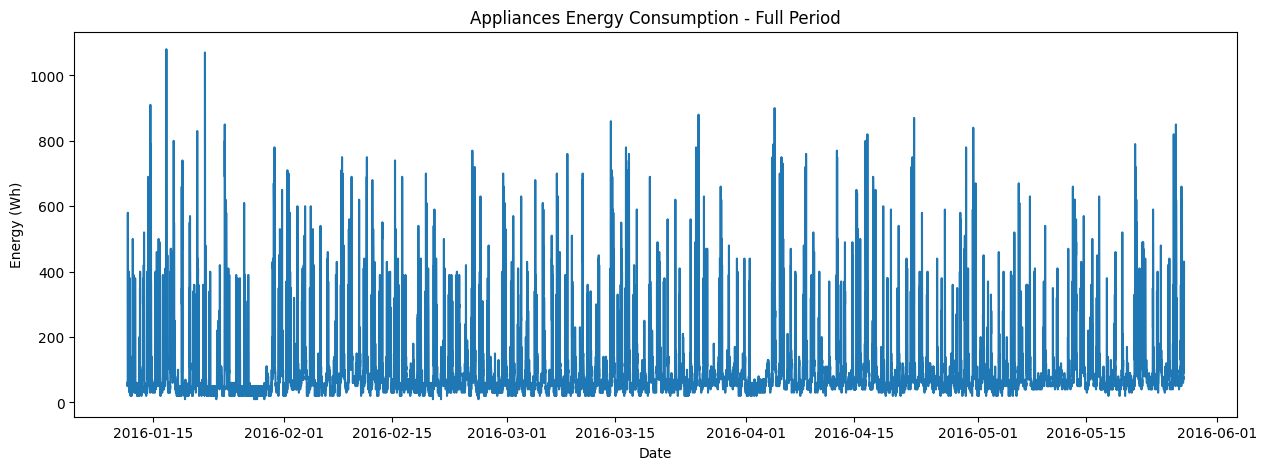

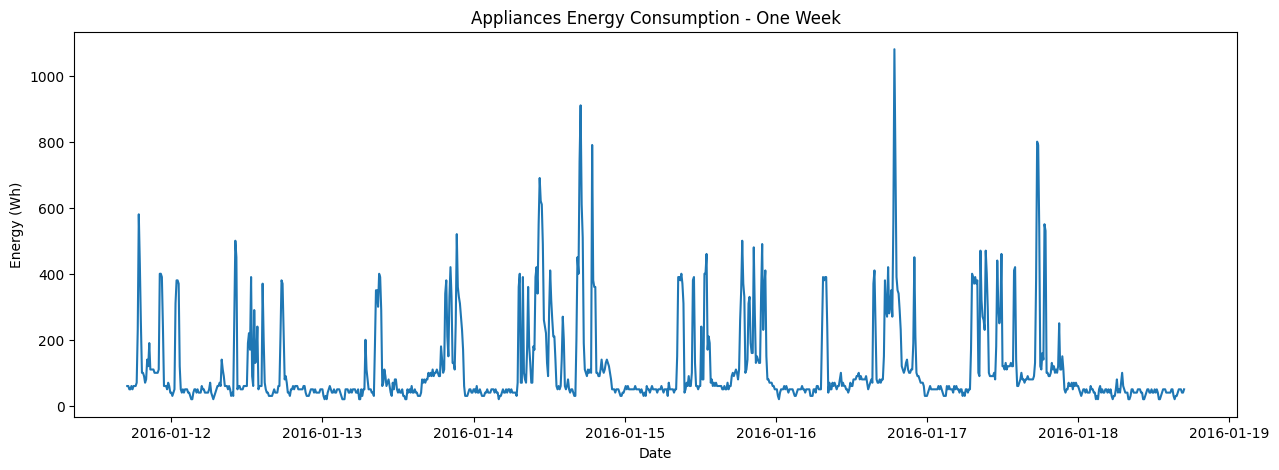

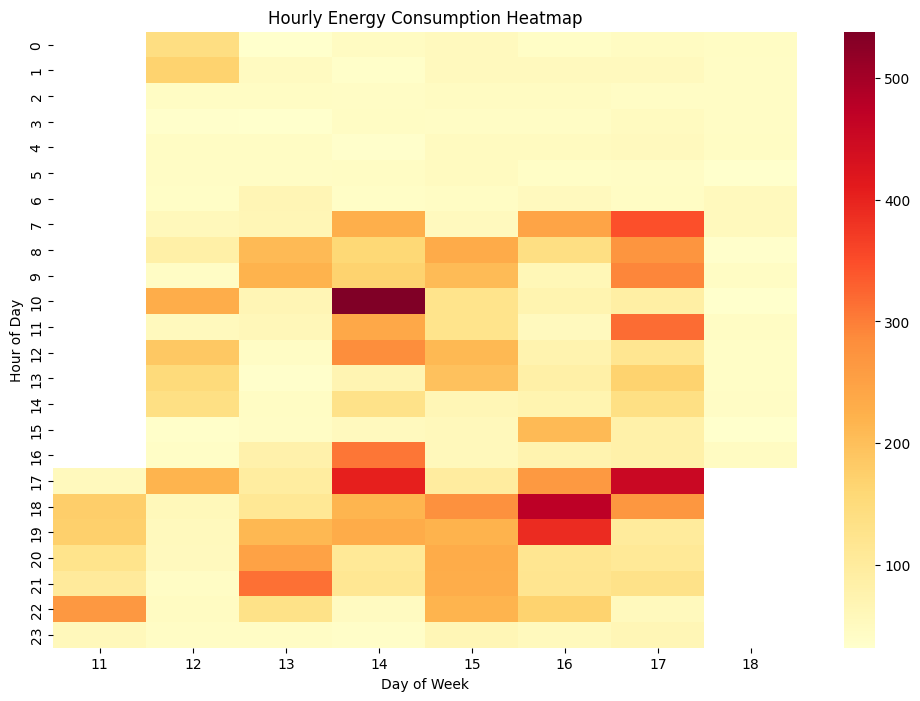

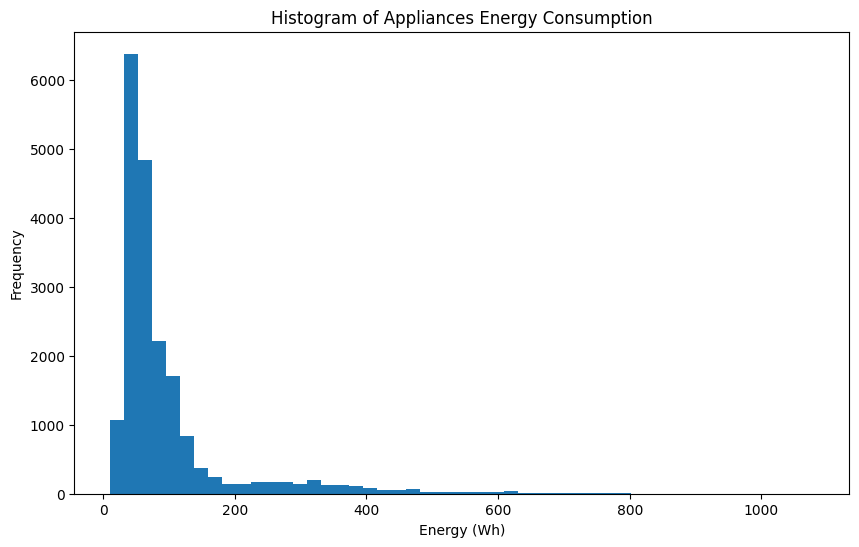

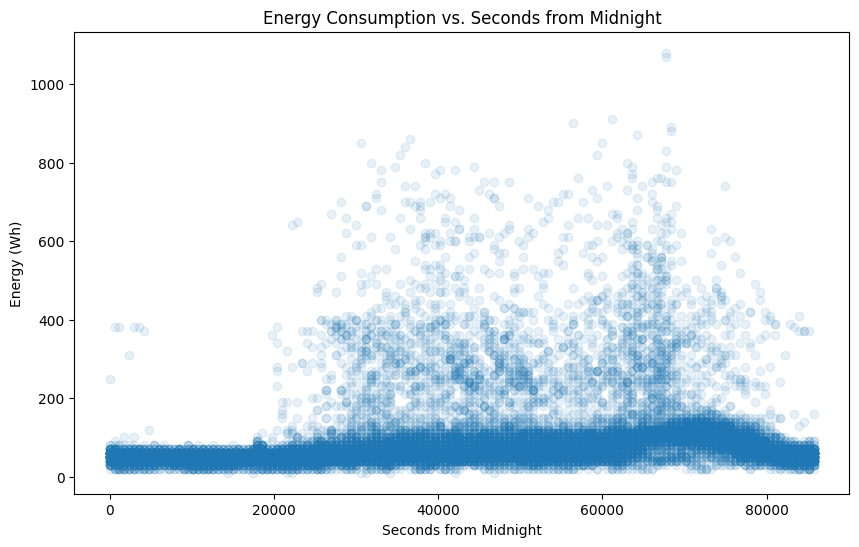

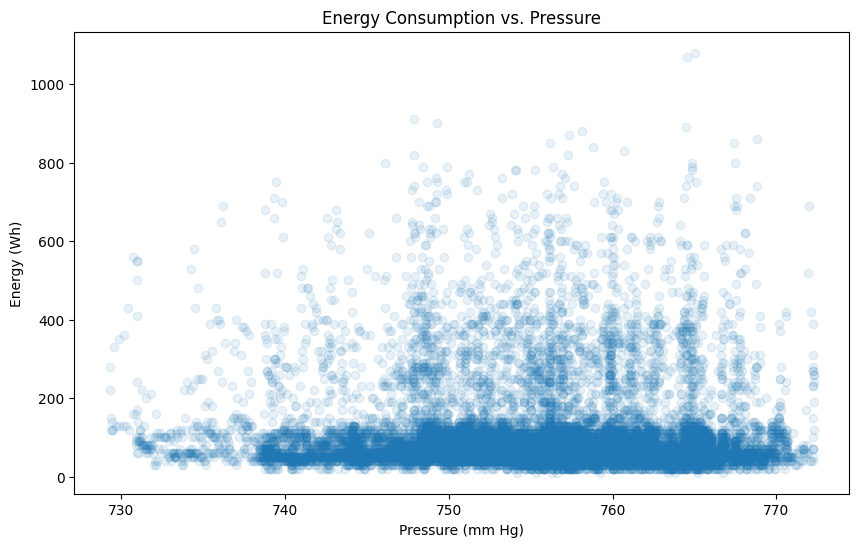

In [ ]:
if __name__ == "__main__":
    print("\nRunning Energy Analysis...")
    energy_analysis()

In [ ]:
#@title Problem 2.3: Multi-variate Analysis
def airfoil_analysis():
    # Load the airfoil data
    columns = ['Frequency', 'Angle', 'Chord', 'Velocity', 'Thickness', 'Sound']
    df = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=columns)

    # Calculate descriptive statistics for each column
    stats_dict = {}
    for column in df.columns:
        stats_dict[column] = {
            'Mean': np.mean(df[column]),
            'Std Dev': np.std(df[column]),
            'Median': np.median(df[column]),
            'Kurtosis': stats.kurtosis(df[column]),
            'Skewness': stats.skew(df[column]),
            'Range': np.ptp(df[column])
        }

    # Convert to DataFrame for nice display
    stats_df = pd.DataFrame(stats_dict)
    print("\nDescriptive Statistics for Airfoil Data:")
    print(stats_df)

In [ ]:
if __name__ == "__main__":
    print("\nRunning Airfoil Analysis...")
    airfoil_analysis()


Running Airfoil Analysis...

Descriptive Statistics for Airfoil Data:
             Frequency      Angle     Chord   Velocity  Thickness       Sound
Mean       2886.380572   6.782302  0.136548  50.860745   0.011140  124.835943
Std Dev    3151.524202   5.916159  0.093510  15.567603   0.013146    6.896361
Median     1600.000000   5.400000  0.101600  39.600000   0.004957  125.721000
Kurtosis      5.685722  -0.415568 -1.038504  -1.562743   2.207539   -0.317132
Skewness      2.134951   0.688476  0.457001   0.235617   1.700465   -0.418534
Range     19800.000000  22.200000  0.279400  39.600000   0.058011   37.607000
